# Ex 1

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data = pd.read_csv('C:/Users/endri/amas/lec10/Data for PS10-20230624/iris.csv')

# Split the data into features and target variables
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=800)

# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9666666666666667


# Ex2


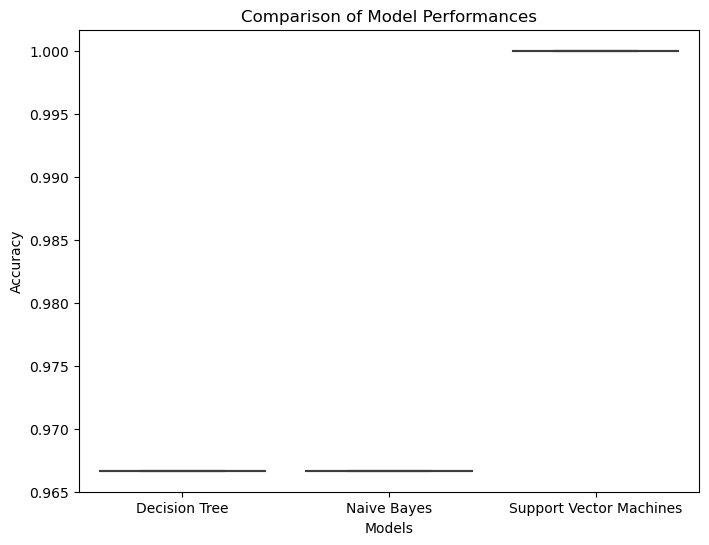

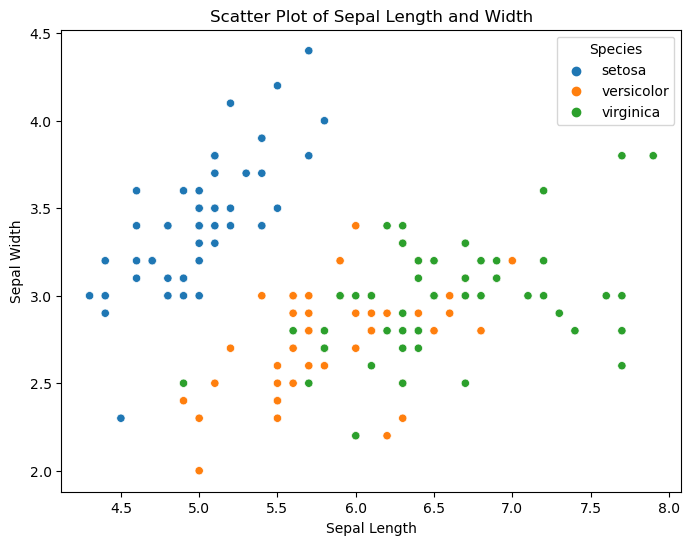

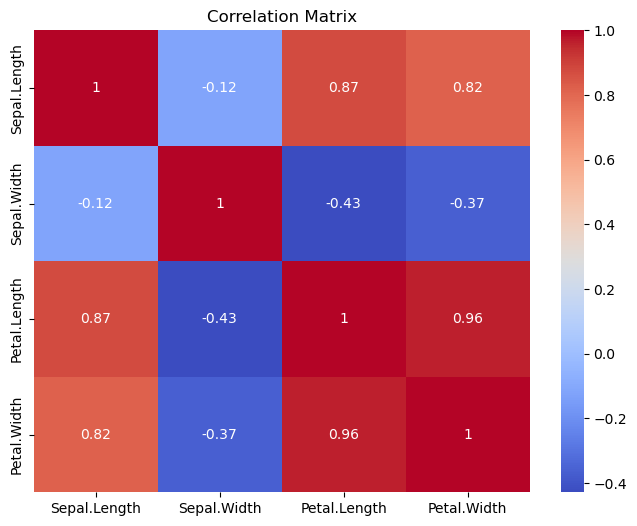

Confusion Matrix:
[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris_data = pd.read_csv("C:/Users/endri/amas/lec10/Data for PS10-20230624/iris.csv")

# Split the data into training and testing sets
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=800)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Support Vector Machines Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Compare model performances
models = ["Decision Tree", "Naive Bayes", "Support Vector Machines"]
accuracies = [dt_accuracy, nb_accuracy, svm_accuracy]
comparison = pd.DataFrame({"Models": models, "Accuracies": accuracies})

# Visualize model performances with boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=comparison, x="Models", y="Accuracies")
plt.title("Comparison of Model Performances")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_data, x="Sepal.Length", y="Sepal.Width", hue="Species")
plt.title("Scatter Plot of Sepal Length and Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Correlation matrix
cor_matrix = iris_data.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Confusion matrix for Decision Tree
dt_confusion = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix:")
print(dt_confusion)


# Ex3


## a) Data Reduction

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the 'wine-quality-red.csv' dataset
data = pd.read_csv("C:/Users/endri/amas/lec10/Data for PS10-20230624/wine-quality-red.csv")

# Preprocess the data if necessary (e.g., handle missing values, scale/normalize)
# Separate features and target variable if needed

# Perform PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])
pca_model = PCA()
pca_model.fit(data_scaled)

# Explore PCA results
print("Explained Variance Ratio:")
print(pca_model.explained_variance_ratio_)


Explained Variance Ratio:
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


## b) Cluster Analysis

In [18]:
import pandas as pd
from sklearn.cluster import KMeans

# Preprocess the data if necessary

# Perform k-Means clustering
k = 3  # Number of clusters
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(data.iloc[:, :-1])

# Get cluster assignments
cluster_assignments = kmeans_model.labels_

# Explore clustering results
print(pd.Series(cluster_assignments).value_counts())


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


0    839
1    519
2    241
dtype: int64


## c) Classification

Confusion Matrix:
[[267   6]
 [ 37  10]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


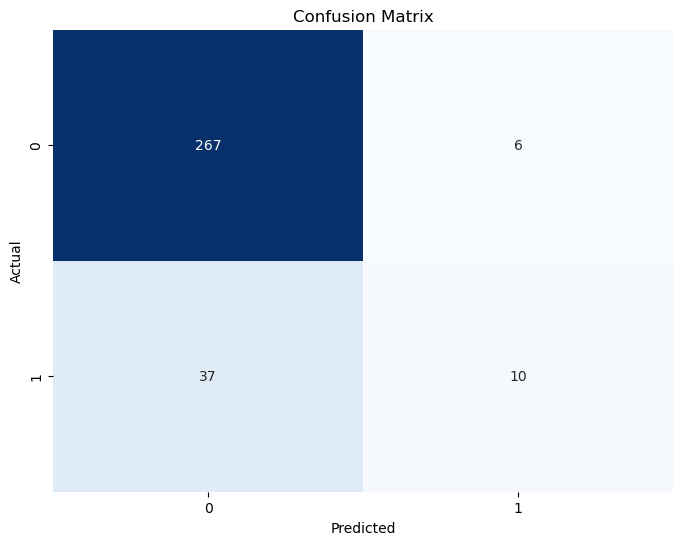

Accuracy (Python): 0.865625


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Convert the 'quality' variable into a binary variable
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into training and testing sets
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy (Python):", accuracy)

# Ex4

Overall Most Popular Search Term: pizza
Month with Highest Search Volume:
Sushi: 37
Avocado: 11.0
Pizza: 100
Donner: 5
Wurst: 74


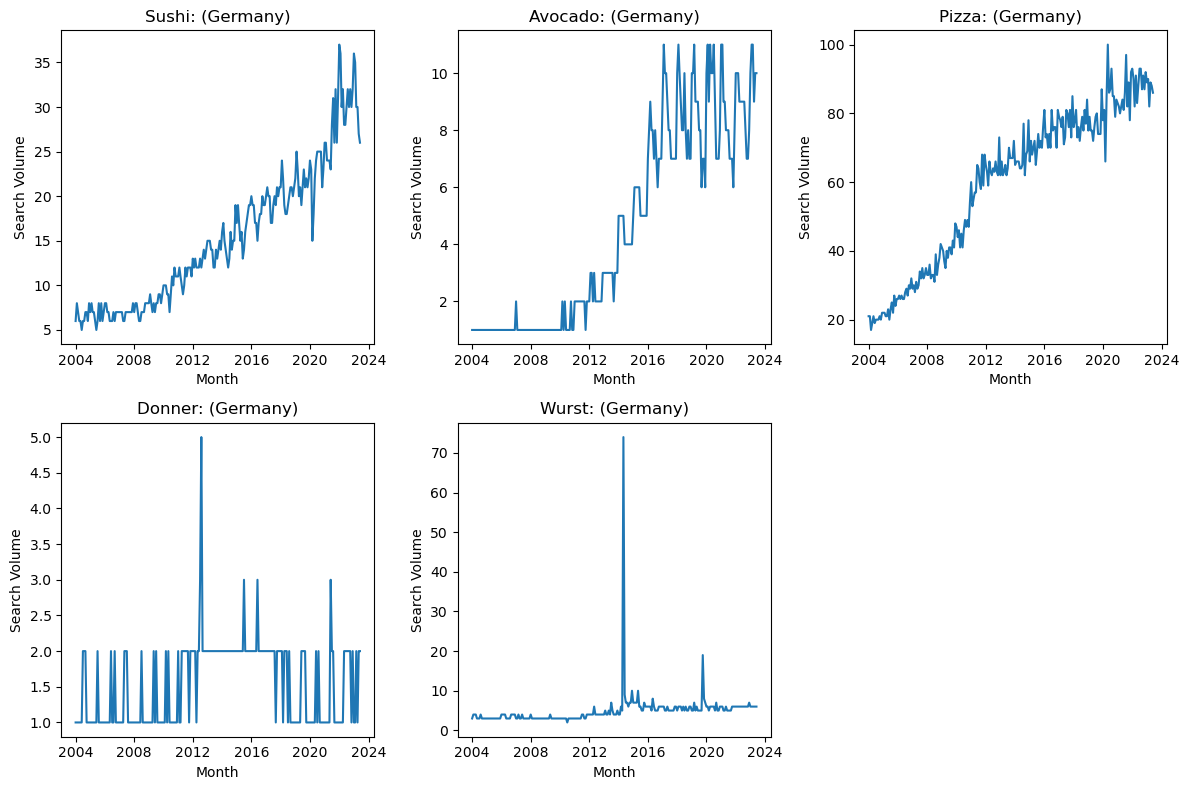

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
combined_data = pd.read_csv("C:\\Users\\endri\\amas\\lec10\\Data for PS10-20230624\\ex4\\all.csv")

# Remove leading and trailing whitespace from column names
combined_data.columns = combined_data.columns.str.strip()

# Convert the 'Month' column to datetime format
combined_data['Month'] = pd.to_datetime(combined_data['Month'], format='%m/%d/%Y')

# Convert 'avocado' column to numeric (remove "<" character)
combined_data['avocado'] = combined_data['avocado'].str.replace('<', '').astype(float)

# Create individual plots for each search term
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(combined_data['Month'], combined_data['sushi'])
plt.xlabel('Month')
plt.ylabel('Search Volume')
plt.title('Sushi: (Germany)')

plt.subplot(2, 3, 2)
plt.plot(combined_data['Month'], combined_data['avocado'])
plt.xlabel('Month')
plt.ylabel('Search Volume')
plt.title('Avocado: (Germany)')

plt.subplot(2, 3, 3)
plt.plot(combined_data['Month'], combined_data['pizza'])
plt.xlabel('Month')
plt.ylabel('Search Volume')
plt.title('Pizza: (Germany)')

plt.subplot(2, 3, 4)
plt.plot(combined_data['Month'], combined_data['donner'])
plt.xlabel('Month')
plt.ylabel('Search Volume')
plt.title('Donner: (Germany)')

plt.subplot(2, 3, 5)
plt.plot(combined_data['Month'], combined_data['wurst'])
plt.xlabel('Month')
plt.ylabel('Search Volume')
plt.title('Wurst: (Germany)')

plt.tight_layout()

# Get the overall most popular search term
most_popular_term = combined_data[['sushi', 'avocado', 'pizza', 'donner', 'wurst']].sum().idxmax()

# Print the most popular term
print("Overall Most Popular Search Term:", most_popular_term)

# Print the month with the highest search volume for each term
print("Month with Highest Search Volume:")
print("Sushi:", combined_data.loc[combined_data['sushi'].idxmax(), 'sushi'])
print("Avocado:", combined_data.loc[combined_data['avocado'].idxmax(), 'avocado'])
print("Pizza:", combined_data.loc[combined_data['pizza'].idxmax(), 'pizza'])
print("Donner:", combined_data.loc[combined_data['donner'].idxmax(), 'donner'])
print("Wurst:", combined_data.loc[combined_data['wurst'].idxmax(), 'wurst'])

# Display the plots
plt.show()
